## First Movement: Periodic Defense with Poisson Attack Pattern

In [17]:
print("""This Cell is necessary or else my IDE will start running cells simultaneously which
      then leads to issues with unfinished imports""")

This Cell is necessary or else my IDE will start running cells simultaneously which
      then leads to issues with unfinished imports


In [18]:
import os
import logging
import numpy as np
from datetime import datetime
from scipy.stats import poisson

In [19]:
log_path = os.path.join(os.getcwd(), 'experiment_1.log')

if os.path.exists(log_path):
    os.remove(log_path)

logger = logging.getLogger()
handler = logging.FileHandler(log_path, mode='w')
handler.setFormatter(logging.Formatter('%(message)s'))
logger.addHandler(handler)
logger.setLevel(logging.INFO)

logger.info(f'[1] "experiment_1.log"')
logger.info(f'[1] "{datetime.now().strftime("%a %b %d %H:%M:%S %Y")}"')

In [20]:
# Global configuration
# This is the default weight value we will insert any time we we 
# need to insert a weight value for a trivial edge in the graph
DEFAULT_WEIGHT_VALUE = 0  

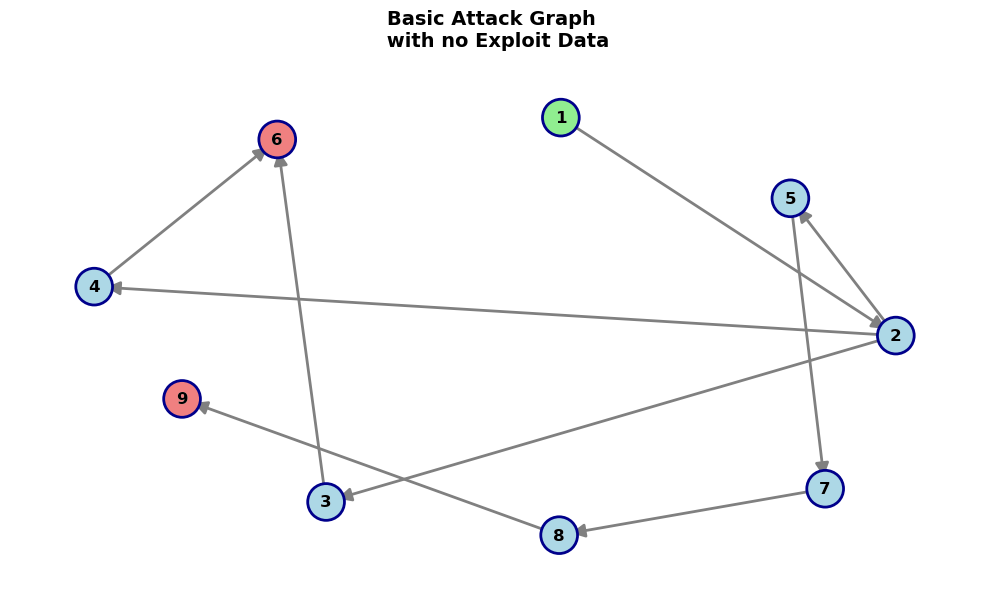

In [21]:
%run attack_graph_MARA.ipynb

### Poisson Distribution Explanations

#### Base Formula

The Poisson distribution models the number of events occurring in a fixed interval. Its probability mass function is:

\begin{equation}
P(X=x) = \frac{\lambda^k}{k!} \cdot e^{-k}
\end{equation}

Where $\lambda$ is the average number of events per interval and $k$ is the count of events.

#### Basic Explanation


Definition of "λ" in our Specific Case
In this security model, $\lambda$ represents:

$\lambda = \text{expected number of exploits per time unit}$.

This corresponds to formula (10) in the paper.

Basic Explanation
Poisson distribution models attacker behavior with fixed defender checks:

$\lambda$ directly controls attacker's "aggressiveness" between defender checks.
- Higher $\lambda$ means attacker attempts more exploits (example: λ=2) in a given time period
- Lower $\lambda$ means fewer expected attack steps
- Most likely: taking λ (or λ-1) steps
- defense_rate not needed since checks happen at known times
- Key insight: periodic defender pattern means attacker only needs to worry about own speed
- This fits our intuition: when defender checks at predictable times, attacker can optimize their moves accordingly, focusing on maximizing progress during known safe periods.

In [22]:
attack_rate_list = [2]  
defense_rate_list = [0]

def random_steps(route, attack_rate=None, defense_rate=None, graph=None):
    length = len(route)
    if attack_rate is None:
        attack_rate = 2
    # Get PMF for values 0 to length-1
    pmf = poisson.pmf(np.arange(length), attack_rate)
    # Normalize (though poisson.pmf should already sum to ~1)
    pmf = pmf / pmf.sum()
    return pmf

In [23]:

# %run ctr-core_tests.ipynb
%run exp_ctr-core.ipynb
main()


After merging targets:
Nodes: [1, 2, 3, 4, 5, 7, 8, 'c(6,9)']
Total list of Edges with their weights:
1 -> 2 (key=0) : 0
2 -> 3 (key=0) : 0
2 -> 4 (key=0) : 0
2 -> 5 (key=0) : 0
3 -> c(6,9) (key=0) : 0
4 -> c(6,9) (key=0) : 0
5 -> 7 (key=0) : 0
7 -> 8 (key=0) : 0
8 -> c(6,9) (key=0) : 0

Debug - Current strategies:
as1: [2, 3, 4, 5, 7, 8]

Debug - Current paths:
  0: [1, 2, 3, 'c(6,9)']
  1: [1, 2, 4, 'c(6,9)']
  2: [1, 2, 5, 7, 8, 'c(6,9)']

=== Debug: Final Payoff Matrix ===
Matrix dimensions: 6 x 3

Payoff Matrix (probability of reaching target):
Row  1: 0.111111 0.111111 0.212865
Row  2: 0.000000 0.177778 0.228739
Row  3: 0.177778 0.000000 0.228739
Row  4: 0.177778 0.177778 0.177778
Row  5: 0.177778 0.177778 0.111111
Row  6: 0.177778 0.177778 0.000000

=== End Debug: Final Payoff Matrix ===



In [24]:
with open('experiment_1.log', 'r') as f:
    print(f.read())

[1] "experiment_1.log"
[1] "Sat Mar 01 16:24:35 2025"

++++++++++++++++++++++++++++++++

The virtual target nodeID is c(6,9)

attack rate =  2 , defense rate =  0 

	equilibrium for multiobjective security game (MOSG)

optimal defense strategy:
         prob.
2 0.000000e+00
3 2.798527e-01
4 2.798527e-01
5 0.000000e+00
7 0.000000e+00
8 4.402946e-01

worst case attack strategies per goal:
          1
1 0.3600737
2 0.3600737
3 0.2798527
[1] 0.128

Defender can keep attacker success below: 0.128
Attacker can guarantee success probability of: 0.128

